In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data
# add as header the columns names: statement_id, label, statement, subject, speaker, job_title, state, party, barely_true_c, false_c, half_true_c, mostly_true_c, pants_on_fire_c, context
header = ['statement_id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state', 'party', 'barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c', 'pants_on_fire_c', 'context']
test_data = pd.read_csv('test.tsv', sep='\t', names=header)
train_data = pd.read_csv('train.tsv', sep='\t', names=header)
valid_data = pd.read_csv('valid.tsv', sep='\t', names=header)


In [4]:
# unit test, train, and valid into one dataset
data = pd.concat([train_data, test_data, valid_data])

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   statement_id     1267 non-null   object
 1   label            1267 non-null   object
 2   statement        1267 non-null   object
 3   subject          1267 non-null   object
 4   speaker          1267 non-null   object
 5   job_title        942 non-null    object
 6   state            1005 non-null   object
 7   party            1267 non-null   object
 8   barely_true_c    1267 non-null   int64 
 9   false_c          1267 non-null   int64 
 10  half_true_c      1267 non-null   int64 
 11  mostly_true_c    1267 non-null   int64 
 12  pants_on_fire_c  1267 non-null   int64 
 13  context          1250 non-null   object
dtypes: int64(5), object(9)
memory usage: 138.7+ KB


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   statement_id     10240 non-null  object 
 1   label            10240 non-null  object 
 2   statement        10240 non-null  object 
 3   subject          10238 non-null  object 
 4   speaker          10238 non-null  object 
 5   job_title        7343 non-null   object 
 6   state            8032 non-null   object 
 7   party            10238 non-null  object 
 8   barely_true_c    10238 non-null  float64
 9   false_c          10238 non-null  float64
 10  half_true_c      10238 non-null  float64
 11  mostly_true_c    10238 non-null  float64
 12  pants_on_fire_c  10238 non-null  float64
 13  context          10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [7]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   statement_id     1284 non-null   object
 1   label            1284 non-null   object
 2   statement        1284 non-null   object
 3   subject          1284 non-null   object
 4   speaker          1284 non-null   object
 5   job_title        939 non-null    object
 6   state            1005 non-null   object
 7   party            1284 non-null   object
 8   barely_true_c    1284 non-null   int64 
 9   false_c          1284 non-null   int64 
 10  half_true_c      1284 non-null   int64 
 11  mostly_true_c    1284 non-null   int64 
 12  pants_on_fire_c  1284 non-null   int64 
 13  context          1272 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.6+ KB


In [8]:
train_data.head()

,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


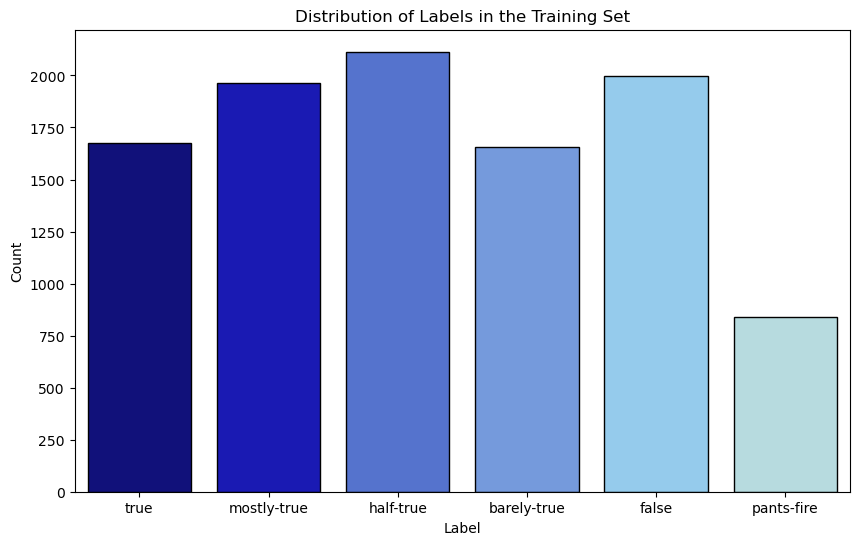

In [71]:
# Assuming train_data is your DataFrame
# Convert the labels to a categorical type if they are not already
data['label'] = data['label'].astype('category')
label_order = ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']

# Define the custom color palette with a gradient from dark blue to light blue
custom_palette = ['#00008B', '#0000CD', '#4169E1', '#6495ED', '#87CEFA', '#B0E0E6']

# Plot the distribution of the labels with the custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='label', palette=custom_palette, order=label_order,edgecolor = "black")
plt.title('Distribution of Labels in the Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


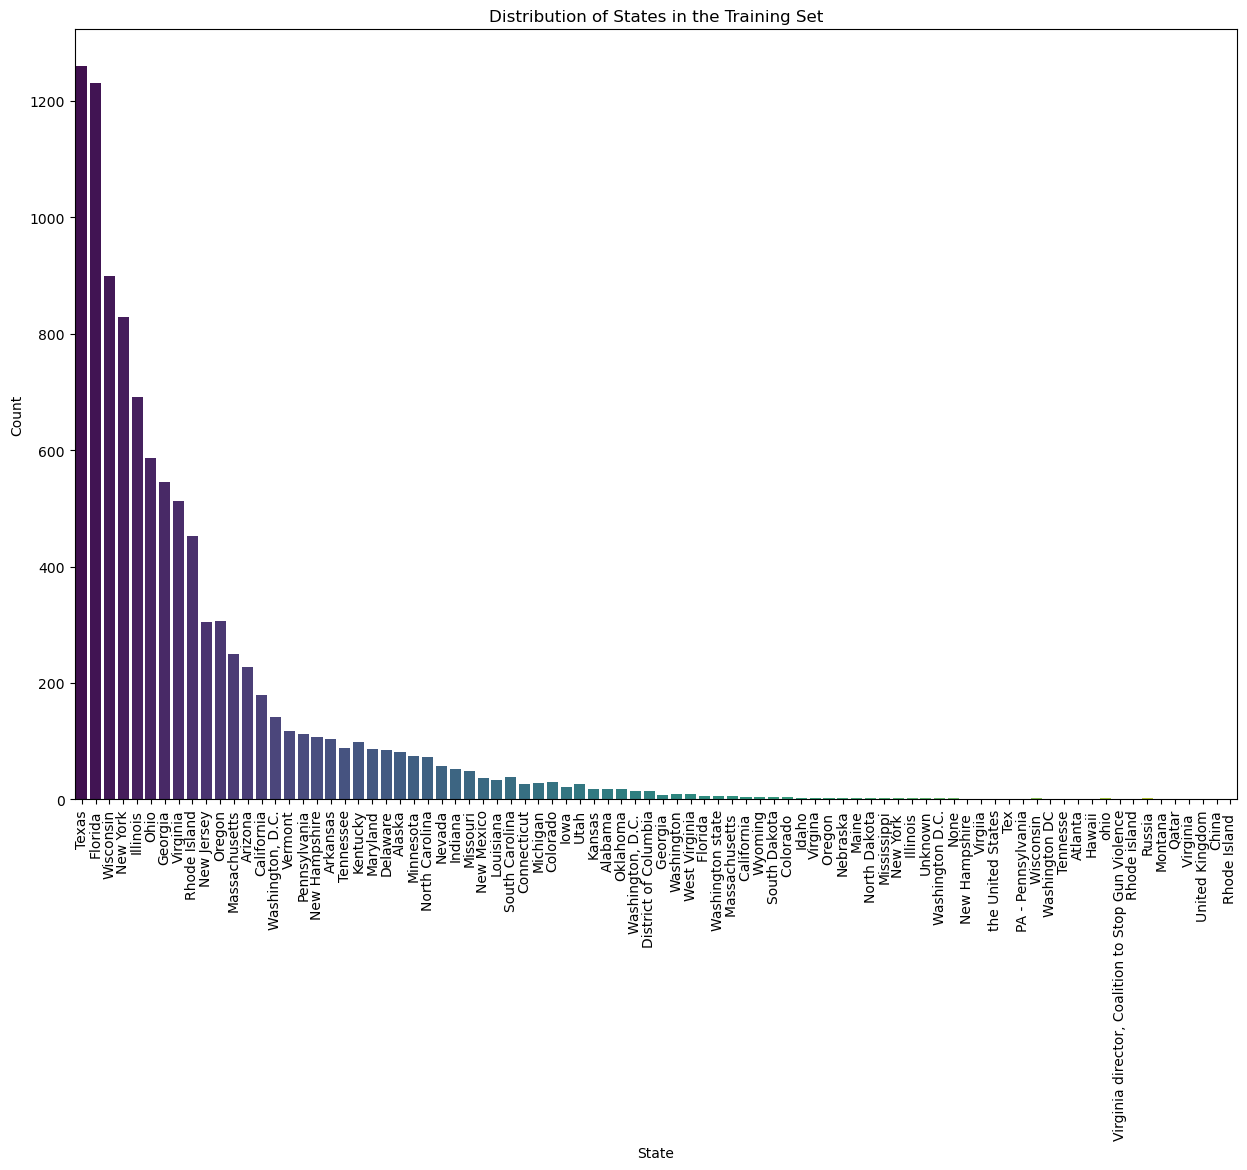

In [10]:
# plot the distribution of the states in the training set
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='state', palette='viridis', order=train_data['state'].value_counts().index)
plt.title('Distribution of States in the Training Set')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

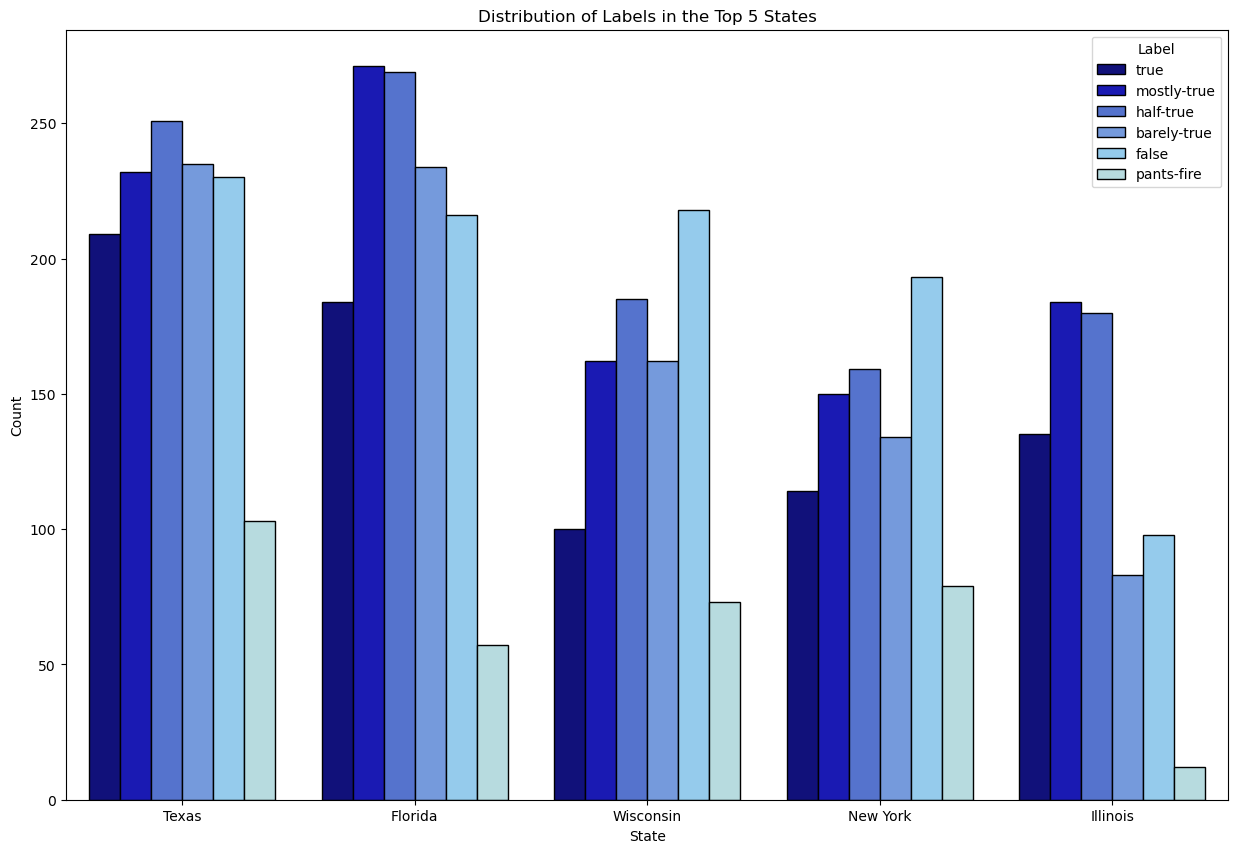

In [70]:
# show the distribution of the labels to the 5 top states
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='state', hue='label', palette=custom_palette, order=data['state'].value_counts().index[:5], hue_order=label_order,edgecolor = "black")
plt.title('Distribution of Labels in the Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.show()

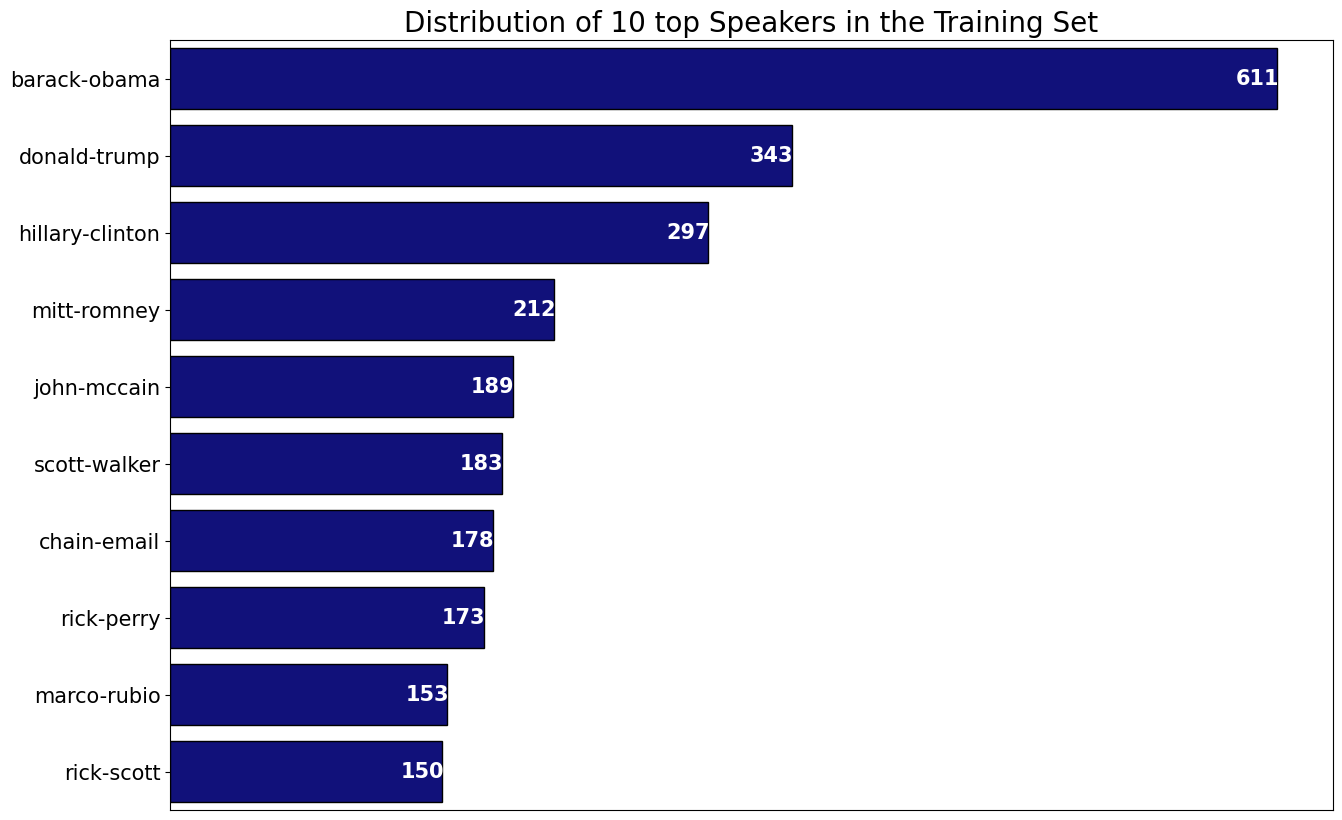

In [129]:
# plot the distribution of the states in the training set
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=data, y='speaker', order=data['speaker'].value_counts().index[:10], color = "darkblue", edgecolor = "black")
plt.title('Distribution of 10 top Speakers in the Training Set', size = 20)
ax.bar_label(ax.containers[0], label_type='edge',padding = -30, color = "white", size = 15, fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.yticks(size = 15)
ax.tick_params(bottom=False, labelbottom=False)
plt.show()

C:\Users\Dana\AppData\Local\Temp\ipykernel_10136\3686053215.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_speaker_data = data[train_data['speaker'] == top_speaker]


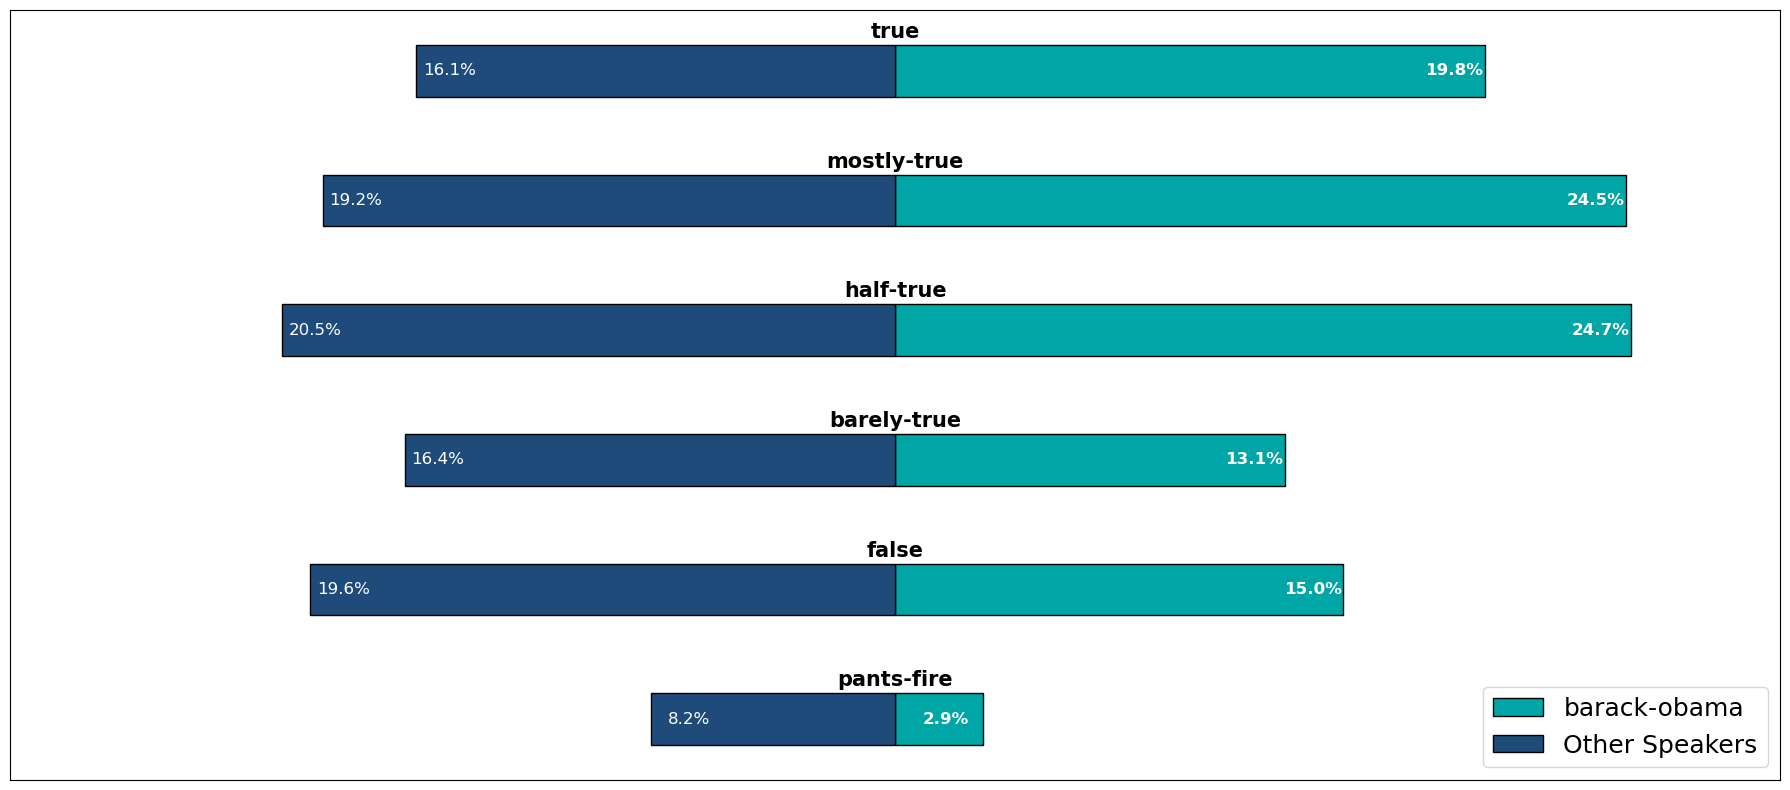

In [128]:

# Detailed analysis for the top speaker
top_speaker = data['speaker'].value_counts().idxmax()
top_speaker_data = data[train_data['speaker'] == top_speaker]
average_distribution = data['label'].value_counts(normalize=True)
average_distribution = average_distribution.reindex(label_order)

# Plot the detailed analysis
fig, ax = plt.subplots( figsize=(18, 8))
#y_ticks = np.arange(0, 0.26, 0.05)


# Top speaker's label distribution
average_top_speaker = top_speaker_data['label'].value_counts(normalize=True)
average_top_speaker = average_top_speaker.reindex(label_order)
#sns.countplot(data=top_speaker_data, x='label', palette=custom_palette, ax=ax[0],order=label_order)
#average_top_speaker.plot(kind = 'bar', color = custom_palette, ax=ax[0],edgecolor = "black")
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center', size = 12)
#ax[0].set_yticks(y_ticks)
#ax[0].set_title(f'Distribution of Labels for {top_speaker}', size = 15)
#ax[0].set_xlabel(None)
#ax[0].set_ylabel('Proportion', size = 12)

# Plot public and private data side by side
y_pos = np.arange(len(label_order))
ax.barh(y_pos, average_top_speaker.values, color='#00a6a6', label=top_speaker, height=0.4, align='center', edgecolor='black')
ax.barh(y_pos, -average_distribution.values, color='#1e4b7a', label='Other Speakers', height=0.4, align='center', edgecolor='black')

ax.legend(loc='lower right', fontsize = 18)
# Center the plot on zero
max_value = max(average_top_speaker.max() + 0.05, average_distribution.max() + 0.05) 
ax.set_xlim(-max_value, max_value)

# Add value labels on the bars
for i, (v1, v2) in enumerate(zip(average_top_speaker, average_distribution)):
    ax.text(v1 - 0.02 , i , f'{v1:.1%}', va='center', ha='left', fontweight='bold', color = 'white', size = 12)
    ax.text(-v2 + 0.02 , i , f'{v2:.1%}', va='center', ha='right', color = 'white', size = 12)
    
    # Add labels between bars
    ax.text(0, i-0.3, label_order[i], va='center', ha='center', fontweight='bold', size = 15)

ax.invert_yaxis()

# Remove x-axis ticks
ax.tick_params(bottom=False, labelbottom=False, left = False, labelleft=False)

plt.tight_layout()
plt.show()

# Average distribution of labels
#average_distribution.plot(kind='bar', color=custom_palette, ax=ax[1],edgecolor = "black")
#ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0, ha='center', size = 12)
#ax[1].set_yticks(y_ticks)
#ax[1].set_title('Average Distribution of Labels for All Other Speakers', size = 15)
#ax[1].set_xlabel(None)
#ax[1].set_ylabel('Proportion', size = 12)
# make the labels horizontal


#plt.tight_layout()
#plt.show()